#**Task 1- Linear Regression SK Learn implementation**

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
df = pd.read_csv('/content/Real_Estate_Sales_2001-2022_GL-Short.csv', index_col="Serial Number") # Added the filepath to the read_csv function
print(df)

               List Year Date Recorded        Town                Address  \
Serial Number                                                               
2020177             2020    04/14/2021     Ansonia          323 BEAVER ST   
2020225             2020    05/26/2021     Ansonia         152 JACKSON ST   
2020348             2020    09/13/2021     Ansonia        230 WAKELEE AVE   
2020090             2020    12/14/2020     Ansonia            57 PLATT ST   
200500              2020    09/07/2021        Avon           245 NEW ROAD   
...                  ...           ...         ...                    ...   
201166              2020    08/26/2021     Meriden  6006 MEETINGHOUSE VLG   
200177              2020    06/09/2021  Middlebury       289 BURR HALL RD   
200531              2020    04/05/2021  Middletown         87 WESTWOOD LA   
200888              2020    07/29/2021  Middletown            PHEDON PKWY   
200092              2020    11/02/2020  Middletown    1692 BARTHOLOMEW RD   

In [43]:
print(df.info())
print(df.dtypes)
print(df.describe())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 2020177 to 200092
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   List Year         142 non-null    int64  
 1   Date Recorded     142 non-null    object 
 2   Town              142 non-null    object 
 3   Address           142 non-null    object 
 4   Assessed Value    142 non-null    float64
 5   Sale Amount       142 non-null    float64
 6   Sales Ratio       142 non-null    float64
 7   Property Type     142 non-null    object 
 8   Residential Type  115 non-null    object 
 9   Non Use Code      8 non-null      object 
 10  Assessor Remarks  14 non-null     object 
 11  OPM remarks       0 non-null      float64
 12  Location          9 non-null      object 
dtypes: float64(4), int64(1), object(8)
memory usage: 15.5+ KB
None
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assess

In [44]:
X = df[['Assessed Value']].values
y = df['Sale Amount'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept:", intercept)
print("Slope:", slope)
def predict_sale(assessed_value):
    return intercept + slope * assessed_value

print(predict_sale(150000))
print(predict_sale(250000))
print(predict_sale(500000))
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Intercept: 39184.21213081997
Slope: 1.536841922248889
269710.5004681533
423394.6926930422
807605.1732552645
MAE: 139999.37025662832
MSE: 53563564913.9237
RMSE: 231438.0368779594


#**Task 2 – Linear Regression (Zameen.com PK Property Data)**


In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
url = "/content/zameencom-property-data-By-Kaggle (1).csv"
try:
    df = pd.read_csv(url, index_col="property_id")
except pd.errors.ParserError:
    print("Comma delimiter failed, trying semicolon...")
    df = pd.read_csv(url, index_col="property_id", sep=';')


print(df.head())
print("\nDataFrame Info:")
print(df.info())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

print("\nShape of DataFrame:")
print(df.shape)

Comma delimiter failed, trying semicolon...
             location_id                                           page_url  \
property_id                                                                   
347795                 8  https://www.zameen.com/Property/lahore_model_t...   
482892                48  https://www.zameen.com/Property/lahore_multan_...   
555962                75  https://www.zameen.com/Property/eden_eden_aven...   
562843              3821  https://www.zameen.com/Property/gulberg_2_gulb...   
686990              3522  https://www.zameen.com/Property/allama_iqbal_t...   

            property_type      price           location    city province_name  \
property_id                                                                     
347795              House  220000000         Model Town  Lahore        Punjab   
482892              House   40000000        Multan Road  Lahore        Punjab   
555962              House    9500000               Eden  Lahore        Punjab 

 Linear Regression – Bedrooms (X) vs Price (Y)


In [58]:
X = df[['bedrooms']].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
slope = model.coef_[0]
print("\nIntercept (b0):", intercept)
print("Slope (b1):", slope)

def predict_price(bedrooms):
    return intercept + slope * bedrooms
print("\nPredicted Prices:")
print("2 bedrooms → Rs.", predict_price(2))
print("3 bedrooms → Rs.", predict_price(3))
print("5 bedrooms → Rs.", predict_price(5))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Intercept (b0): -378901.49997583963
Slope (b1): 5300754.46136009

Predicted Prices:
2 bedrooms → Rs. 10222607.422744341
3 bedrooms → Rs. 15523361.884104433
5 bedrooms → Rs. 26124870.80682461

Evaluation Metrics:
Mean Absolute Error (MAE): 15265190.945633907
Mean Squared Error (MSE): 1064123442514893.4
Root Mean Squared Error (RMSE): 32620904.992272876


#**Task 3 – Female Doctors (X) vs Female Dentists (Y)**

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
url = "/content/number-of-registered-medical-and-dental-doctors-by-gender-in-pakistan.csv"
df = pd.read_csv(url, index_col="Years")
df['Female Doctors'] = pd.to_numeric(df['Female Doctors'].astype(str).str.replace(',', ''), errors='coerce')
df['Female Dentists'] = pd.to_numeric(df['Female Dentists'].astype(str).str.replace(',', ''), errors='coerce')
df.dropna(inplace=True)

print(df.head())
print("\nDataFrame Info:")
print(df.info())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

print("\nShape of DataFrame:")
print(df.shape)


       Female Doctors Male Doctors Total Doctors  Female Dentists  \
Years                                                               
2008             3146        2,734         5,880              546   
2009             2987        2,584         5,571              557   
2010             3000        2,413         5,413              477   
2011             4157        3,310         7,467              781   
2012             4779        3,733         8,512              739   

       Male Dentists Total Dentists  
Years                                
2008             251            797  
2009             252            809  
2010             209            686  
2011             360          1,141  
2012             304          1,043  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2008 to 2018
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Female Doctors   11 non-null     int

Linear Regression – Female Doctors → Female Dentists
Predict Female Dentists from Female Doctors
 Test Prediction & Evaluation

In [65]:
X = df[['Female Doctors']].values
y = df['Female Dentists'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
slope = model.coef_[0]
print("\nIntercept (b0):", intercept)
print("Slope (b1):", slope)
def predict_dentists(female_doctors):
    return intercept + slope * female_doctors
print("\nPredicted Female Dentists:")
print("10,000 doctors →", predict_dentists(10000))
print("15,000 doctors →", predict_dentists(15000))
print("20,000 doctors →", predict_dentists(20000))
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Intercept (b0): -162.39243034209926
Slope (b1): 0.2298490527787623

Predicted Female Dentists:
10,000 doctors → 2136.098097445524
15,000 doctors → 3285.3433613393354
20,000 doctors → 4434.5886252331475

Evaluation Metrics:
Mean Absolute Error (MAE): 53.82521122831909
Mean Squared Error (MSE): 6349.9328450147
Root Mean Squared Error (RMSE): 79.68646588357838


#**Task 4 – Predicting Profit using Multiple Features**

In [66]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Step 2: Load dataset
url = "/content/50_Startups.csv"
df = pd.read_csv(url)
print(df.head())  # Print the first 5 rows

# Step 3: Dataset Info
print("\nDataFrame Info:")
print(df.info())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

print("\nShape of DataFrame:")
print(df.shape)


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None

Data Types:
R&D Spend          float64
Administration     float64
Marketing Spend    fl

 Set Independent & Dependent Variables
 Correlation Analysis using Heatmap
 Train-Test Split (90/10)
 Train the Model
 Intercept and Coefficients
  Predict Profit from Test Set
  Metric Evaluation

In [70]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']].values
y = df['Profit'].values

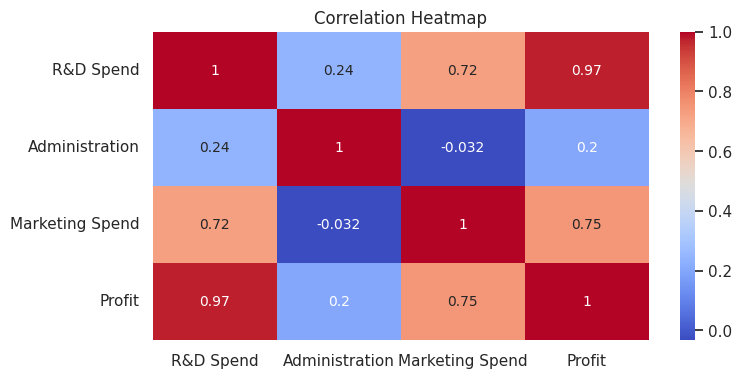

In [69]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("\nIntercept (b0):", model.intercept_)
print("Slopes (b1, b2, b3):", model.coef_)
y_pred = model.predict(X_test)
print("\nActual vs Predicted Profits:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f} | Predicted: {predicted:.2f}")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Intercept (b0): 48990.20118055891
Slopes (b1, b2, b3): [ 0.81076728 -0.03122602  0.03141705]

Actual vs Predicted Profits:
Actual: 134307.35 | Predicted: 127281.63
Actual: 81005.76 | Predicted: 83158.94
Actual: 99937.59 | Predicted: 98505.35
Actual: 64926.08 | Predicted: 45984.16
Actual: 125370.37 | Predicted: 130082.58

Evaluation Metrics:
Mean Absolute Error (MAE): 6853.052041966487
Mean Squared Error (MSE): 87409853.4108027
Root Mean Squared Error (RMSE): 9349.323687347802


#**Task 5 - Multiple Linear Regression SK Learn:**


In [77]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Step 2: Load the dataset
df = pd.read_csv("/content/housing.csv")  # Make sure the CSV is in your working directory
print(df.head())  # Show first 5 rows
print(df.info())      # Structure of data
print(df.describe())  # Summary stats
print(df.shape)       # Rows and columns
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # For simplicity


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

 Feature Selection
 Visualize Correlation
 Split the Data
 Train the Model
Intercept & Slopes
Predictions & Evaluation
Evaluation Metrics



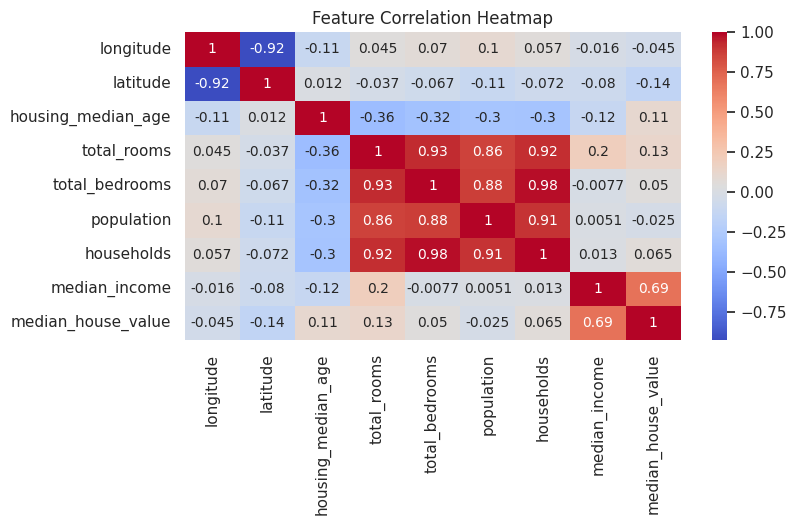

Intercept: -45243.20253474009
Coefficients: [ 4.68443710e+04  1.86786062e+03 -1.79773931e+01  1.29402324e+02]
median_income: 46844.37104657487
housing_median_age: 1867.860624592797
total_rooms: -17.977393094090303
households: 129.40232358720627


In [79]:
X = df[['median_income', 'housing_median_age', 'total_rooms', 'households']]
y = df['median_house_value']

numeric_df = df.drop('ocean_proximity', axis=1)

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm") # Use the numeric_df for correlation
plt.title("Feature Correlation Heatmap")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef}")

In [82]:
y_pred = model.predict(X_test)
print("\nSample Predictions:")
for actual, pred in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("\nEvaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)



Sample Predictions:
Actual: 245800.00, Predicted: 156849.03
Actual: 137900.00, Predicted: 177416.67
Actual: 218200.00, Predicted: 200250.28
Actual: 220800.00, Predicted: 152212.94
Actual: 170500.00, Predicted: 174990.66

Evaluation Metrics:
MAE: 58180.28666390358
MSE: 6177211711.229385
RMSE: 78595.2397491692


#**Task 6 – Multiple Linear Regression on Car Dataset**

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp

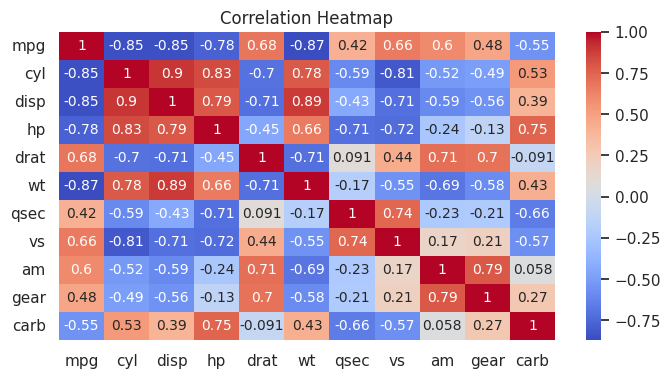

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
url = "/content/mtcars.csv"
df = pd.read_csv(url, index_col=0)
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [92]:
X = df[['hp', 'wt', 'disp']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
y_pred = model.predict(X_test)

print("\nPredictions:")
for actual, pred in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("\nModel Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


Intercept: 36.10212553927562
Coefficients:
hp: -0.02357801822341213
wt: -3.5423885014914487
disp: -0.006287283856428072

Predictions:
Actual: 19.70, Predicted: 21.25
Actual: 10.40, Predicted: 8.93
Actual: 19.20, Predicted: 15.84
Actual: 32.40, Predicted: 26.26

Model Evaluation:
MAE: 3.131656703387161
MSE: 13.397432534395872
RMSE: 3.6602503376676125
